In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
images = sorted(glob.glob("/kaggle/input/lego-minifigure-faces/*/*"))

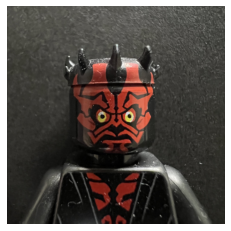

In [3]:
tryimage = plt.imread(images[0])
plt.imshow(tryimage);
plt.axis("off");

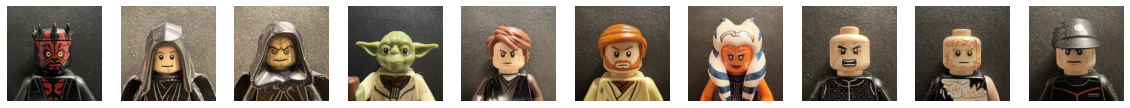

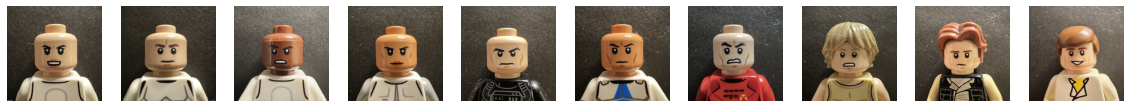

In [4]:
plt.figure(figsize=(20,20))
for i in np.arange(10):
    plt.subplot(1,10,i+1)
    plt.imshow(plt.imread(images[i]))
    plt.axis("off")
plt.figure(figsize=(20,20));
for i in np.arange(10,20):
    plt.subplot(2,10,i+1)
    plt.imshow(plt.imread(images[i]));
    plt.axis("off")
plt.figure(figsize=(20,20));
for i in np.arange(5):
    plt.subplot(1,5,i+1)
    plt.imshow(plt.imread(images[20+i]));
    plt.axis("off")

In [5]:
import cv2
gray_images = []
for i in images:
    gray_images.append(cv2.cvtColor(plt.imread(i), cv2.COLOR_BGR2GRAY))

In [6]:
images = np.array(gray_images)

In [7]:
images.shape

(25, 1024, 1024)

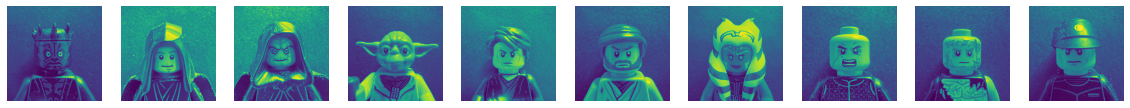

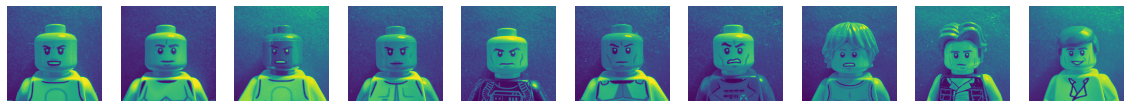

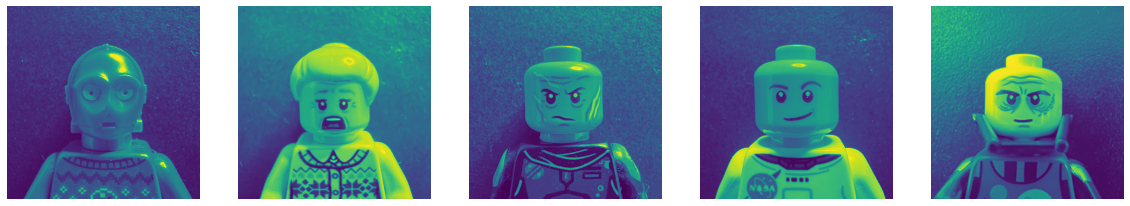

In [8]:
plt.figure(figsize=(20,20))
for i in np.arange(10):
    plt.subplot(1,10,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.figure(figsize=(20,20));
for i in np.arange(10,20):
    plt.subplot(2,10,i+1)
    plt.imshow(images[i]);
    plt.axis("off")
plt.figure(figsize=(20,20));
for i in np.arange(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[20+i]);
    plt.axis("off")

In [9]:
from keras.models import Model
from keras.layers import Dense,Input

In [10]:
x_train = [] 
for i in np.arange(15):
    x_train.append(images[i])

In [11]:
x_test = []
for i in np.arange(15,25):
    x_test.append(images[i])

In [12]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [13]:
print(x_train.shape)
print(x_test.shape)

(15, 1024, 1024)
(10, 1024, 1024)


In [14]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0


In [15]:
x_train[0]

array([[0.30588236, 0.30588236, 0.30980393, ..., 0.34117648, 0.3882353 ,
        0.4       ],
       [0.3137255 , 0.3137255 , 0.30980393, ..., 0.31764707, 0.3647059 ,
        0.39215687],
       [0.31764707, 0.31764707, 0.30980393, ..., 0.31764707, 0.34117648,
        0.36078432],
       ...,
       [0.09803922, 0.09803922, 0.09803922, ..., 0.13725491, 0.13333334,
        0.13725491],
       [0.09803922, 0.09411765, 0.09411765, ..., 0.14509805, 0.14117648,
        0.13725491],
       [0.09411765, 0.09019608, 0.08627451, ..., 0.15294118, 0.14901961,
        0.13725491]], dtype=float32)

In [56]:
from tensorflow.keras.optimizers import RMSprop,Adam,Adagrad
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy

In [81]:
input_img = Input(shape = (1024,))

#Model
#decoded daki dense sayısı ile encoded_input değerindeki Input değeri eşit olmalı(?)
#decoder_layer burada decoded'daki giriş boyutu kadar giriş boyutu alır(?)

encoded = Dense(300,activation="tanh")(input_img)
encoded = Dense(512,activation="tanh")(encoded)
encoded = Dense(450,activation="tanh")(encoded)
encoded = Dense(300,activation="tanh")(encoded)
decoded = Dense(512,activation="sigmoid")(encoded)
decoded = Dense(450,activation="sigmoid")(decoded)
decoded = Dense(300,activation="sigmoid")(decoded)
decoded = Dense(1024,activation="sigmoid")(decoded)

autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.0001),
                   loss=BinaryCrossentropy())
hist = autoencoder.fit(x_train,x_train,epochs=400,
                      batch_size=4,shuffle=True,
                       validation_data=(x_test,x_test))

Epoch 1/400
4/4 [==============================] - 4s 652ms/step - loss: 0.7050 - val_loss: 0.6983
Epoch 2/400
4/4 [==============================] - 2s 544ms/step - loss: 0.6956 - val_loss: 0.6894
Epoch 3/400
4/4 [==============================] - 2s 522ms/step - loss: 0.6875 - val_loss: 0.6817
Epoch 4/400
4/4 [==============================] - 2s 524ms/step - loss: 0.6804 - val_loss: 0.6751
Epoch 5/400
4/4 [==============================] - 2s 518ms/step - loss: 0.6742 - val_loss: 0.6694
Epoch 6/400
4/4 [==============================] - 2s 518ms/step - loss: 0.6697 - val_loss: 0.6642
Epoch 7/400
4/4 [==============================] - 2s 527ms/step - loss: 0.6647 - val_loss: 0.6598
Epoch 8/400
4/4 [==============================] - 2s 510ms/step - loss: 0.6607 - val_loss: 0.6558
Epoch 9/400
4/4 [==============================] - 2s 509ms/step - loss: 0.6571 - val_loss: 0.6523
Epoch 10/400
4/4 [==============================] - 2s 677ms/step - loss: 0.6541 - val_loss: 0.6492
Epoch 11/

In [82]:
x_train.shape

(15, 1024, 1024)

In [83]:
encoder_model = Model(input_img,encoded)
encoded_input = Input(shape=(1024,300,))
decoder_layer = autoencoder.layers[-1]
decoder_model = Model(encoded_input,decoder_layer(encoded_input))

encoded_imgs = encoder_model.predict(x_train)
#decoded hata veriyor
decoded_imgs = decoder_model.predict(encoded_imgs)

In [84]:
aa = autoencoder.predict(x_test)

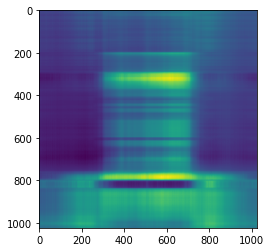

In [85]:
plt.imshow(aa[0]);

In [86]:
decoder_model.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 1024, 300)]       0         
_________________________________________________________________
dense_75 (Dense)             multiple                  308224    
Total params: 308,224
Trainable params: 308,224
Non-trainable params: 0
_________________________________________________________________


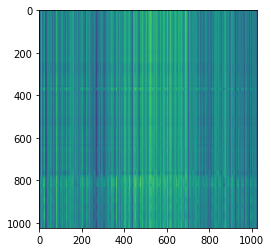

In [87]:
plt.imshow(decoded_imgs[0]);

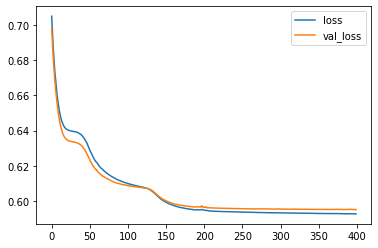

In [88]:
for i in hist.history:
    plt.plot(hist.history[i],label=i);
    plt.legend()